# An Analysis of Insurance Premiums

This analysis will explore the 'US Health Insurance' dataset obtianed from https://www.kaggle.com/teertha/ushealthinsurancedataset. The dataset contains information on insurance charges for individuals around the US, as well as characteristic information such as age, sex, and US region of residence.  A linear regression model will be built and fit with the data to determine if insurance charges can be estimated based on these demographic features.

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set_palette("pastel")

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

There are 1338 rows of data. Each row contains the individual's age, sex, BMI, number of children, smoker status, US region, and their associated insurance premium charges (the dependent variable of interest), with summary statistics noted above for the numerical features.  There are no missing values in the dataset, so I will now begin exploring the data.

# Age Analysis

In [6]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [7]:
np.median(df['age'])

39.0

Age ranges from 18 to 64. Average and median age is 39, and IQR is between ages 27 and 51. 

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


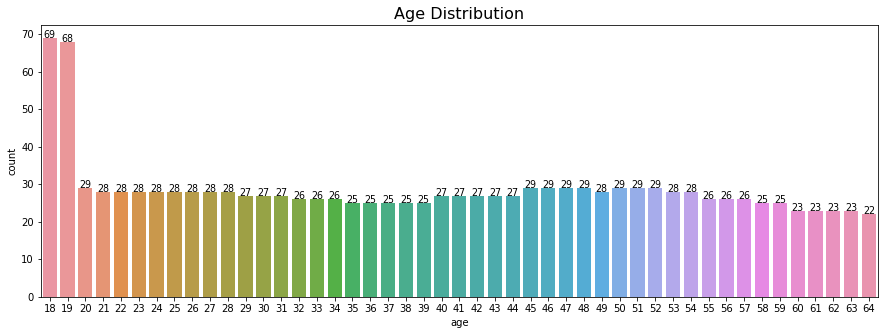

In [8]:
fig = plt.figure(figsize=[15,5])
ax = sns.countplot(df['age'])
ax.set_title('Age Distribution', fontsize=16)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/2, y=p.get_height(), s='{}'.format(p.get_height()),ha='center', fontsize=9.5)

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Violin Plot of Age')

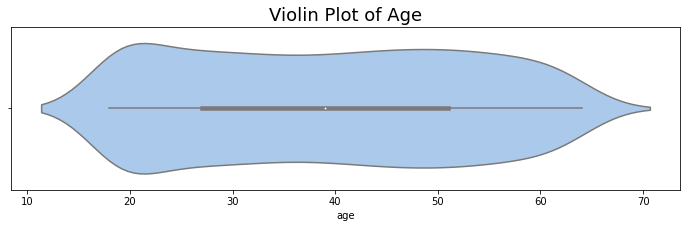

In [9]:
fig = plt.figure(figsize=[12,3])
ax = sns.violinplot(df['age'])
ax.set_title('Violin Plot of Age', fontsize=18)

Age seems to follow a fairly uniform distribution, though the number of 18 year olds and 19 year olds is almost double the number of every other age group.

# Sex Analysis

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


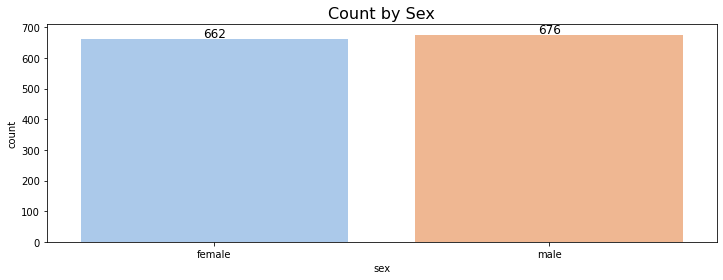

In [10]:
fig = plt.figure(figsize=[12,4])
ax = sns.countplot(df['sex'])
ax.set_title('Count by Sex', fontsize=16)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/2, y=p.get_height()+5, s='{}'.format(p.get_height()),ha='center', fontsize=12)

There is a roughly even split between males and females in the dataset.

# BMI Analysis

In [11]:
bmi = df['bmi']
bmi.head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

In [12]:
bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [13]:
np.median(bmi)

30.4

BMI ranges from ~16 to ~53.  The mean and median BMI are ~30.  The IQR falls between ~26 and ~35.  

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of BMI')

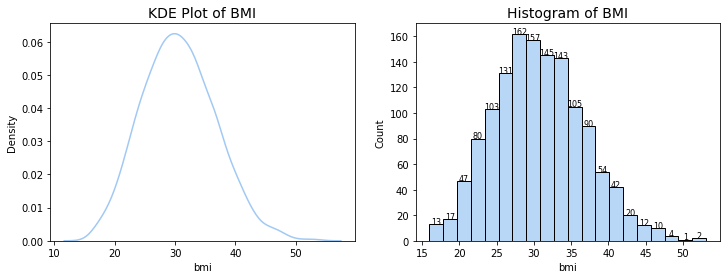

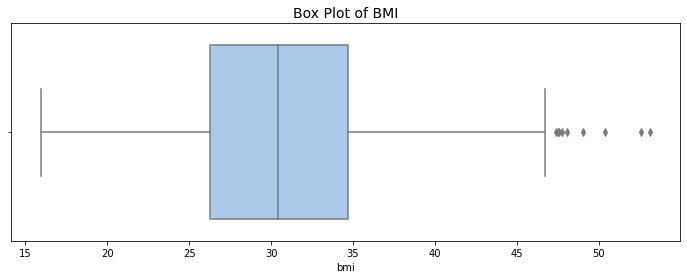

In [14]:
fig = plt.figure(figsize=[12, 4]).tight_layout()

plt.subplot(1,2,1)
ax = sns.kdeplot(bmi)
ax.set_title('KDE Plot of BMI', fontsize=14)

plt.subplot(1,2,2)
ax = sns.histplot(bmi, bins=20)
plt.title('Histogram of BMI', fontsize=14)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/2, y=p.get_height(), s='{}'.format(p.get_height()),ha='center', fontsize=8)

fig = plt.figure(figsize=[12, 4]).tight_layout()
ax = sns.boxplot(bmi)
ax.set_title('Box Plot of BMI', fontsize=14)

The BMI feature follows a fairly standard distribution, as can be seen above.  BMI is ~30 on average, and we see several outliers on the higher end past ~46.

# Children Analysis

In [15]:
children = df[['children']]
children.head()

,children
0,0
1,1
2,3
3,0
4,0


In [16]:
children.describe()

,children
count,1338.000000
mean,1.094918
std,1.205493
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [17]:
np.median(children)

1.0

The number of children ranges from 0 to 5, with the IQR falling between 0 and 2.  The mean and median number of children is 1


c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


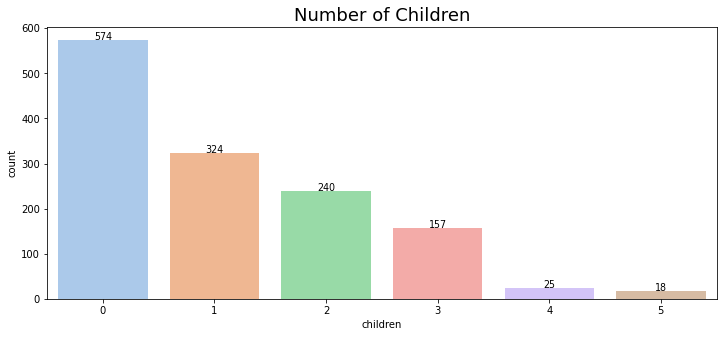

In [18]:
fig = plt.figure(figsize=[12, 5])
ax = sns.countplot(df['children'])
ax.set_title('Number of Children', fontsize=18)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/2, y=p.get_height(), s='{}'.format(p.get_height()),ha='center', fontsize=9.5)

574 individuals do not have any children, with the number of individuals decreasing as number of children increases. Only 18 individuals have 5 children.

# Smoker Analysis

In [19]:
smoker=df['smoker']
smoker.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [20]:
smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count by Smoking Status')

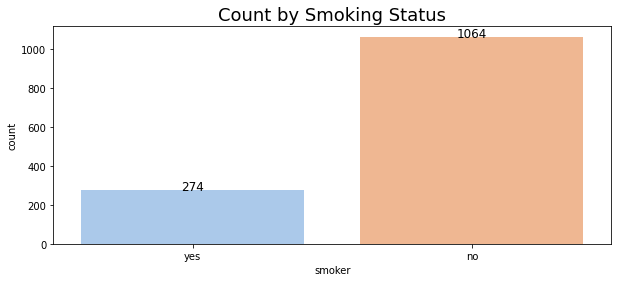

In [21]:
fig = plt.figure(figsize=[10, 4])
ax = sns.countplot(df['smoker'])
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/2, y=p.get_height(), s='{}'.format(p.get_height()),ha='center', fontsize=12)
ax.set_title('Count by Smoking Status', fontsize=18)

In [22]:
print('Ratio of Non-Smokers to Smokers: ', round(smoker.value_counts()['no']/smoker.value_counts()['yes'], 2))

Ratio of Non-Smokers to Smokers:  3.88


The majority of individuals are non-smokers, with non-smokers outweighing smokers by a factor of 3.88.

# Region Analysis

In [23]:
region = df['region']
region.head()

0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
Name: region, dtype: object

In [24]:
region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


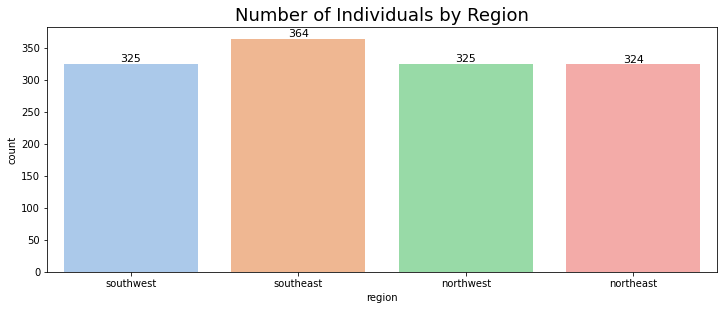

In [25]:
fig = plt.figure(figsize=[12,4.5])
ax = sns.countplot(region)
ax.set_title('Number of Individuals by Region', fontsize=18)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/2, y=p.get_height()+3, s='{}'.format(p.get_height()),ha='center', fontsize=11)

The dataset represents a fairly even mix between the different US regions, with ~40 more individuals from the southeast vs the other regions. 

# Insurance Charges Analysis

After exploring the features of the dataset I will now explore the dependent variable, charges.

In [26]:
charges = df['charges']
charges.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [27]:
charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [28]:
np.median(charges)

9382.033

Insurance charges range from \\$1,122 to \\$63,770, with a mean of \\$13,270 and a median of \\$9,382.

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of Premium Charges')

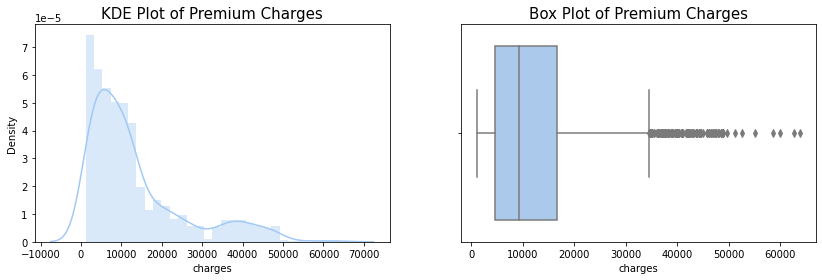

In [29]:
fig = plt.figure(figsize=[14,4]).tight_layout()

plt.subplot(1,2,1)
ax = sns.distplot(charges)
ax.set_title('KDE Plot of Premium Charges', fontsize=15)

plt.subplot(1,2,2)
ax = sns.boxplot(charges)
ax.set_title('Box Plot of Premium Charges', fontsize=15)

There is heavy right-skew with the majority of charges falling below \\$20,000, with a slight uptick around the \\$40,000 - \\$50,000 range.  There are a large number of outliers on the high end, at ~\\$35,000 and above.

After exploring the features and target variable independently, I will now analyze charges against the various features to identify any meaningful correlations.

# Bivariate Analysis

### Age

Text(0.5, 1.0, 'Charges vs. Age')

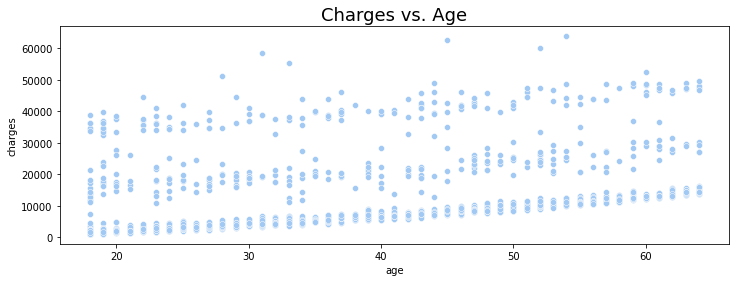

In [30]:
fig = plt.figure(figsize=[12, 4])
ax = sns.scatterplot(x=df['age'], y=df['charges'])
ax.set_title('Charges vs. Age', fontsize=18)

A positive trend can be seen  - as age increases, charges tend to increase as well.

In [31]:
women = df[['sex', 'charges']][df['sex'] == 'female']
men = df[['sex', 'charges']][df['sex'] == 'male']

women_median = np.median(women['charges'])
men_median = np.median(men['charges'])
print('Median Charges for Men: ', men_median, '\nMedian Charges for Women: ', women_median, '\nDifference: ', women_median-men_median)

Median Charges for Men:  9369.61575 
Median Charges for Women:  9412.9625 
Difference:  43.34674999999879


Text(0.5, 1.0, 'Boxplot of Charges - Female vs Male')

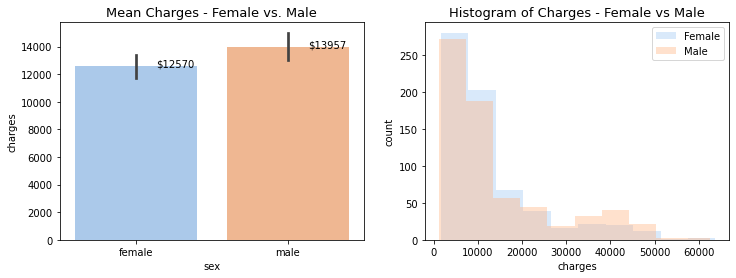

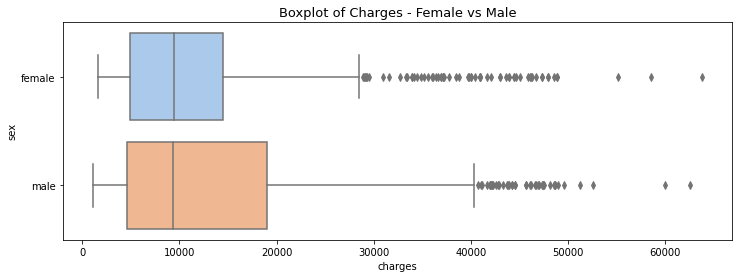

In [32]:
fig = plt.figure(figsize=[12, 4]).tight_layout(h_pad=5.0, w_pad=2.5)

plt.subplot(1,2,1)
ax = sns.barplot(data=df, x='sex', y='charges')
ax.set_title('Mean Charges - Female vs. Male', fontsize=13)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.5, y=p.get_height(), s='${}'.format(round(p.get_height())), fontsize=10)

plt.subplot(1,2,2)
plt.hist(df['charges'][df['sex']=='female'], alpha=0.4, label='Female')
plt.hist(df['charges'][df['sex']=='male'], alpha=0.4, label='Male')
plt.ylabel('count')
plt.xlabel('charges')
plt.title('Histogram of Charges - Female vs Male', fontsize=13)
plt.legend()

fig = plt.figure(figsize=[12,4])
ax = sns.boxplot(data=df, x='charges', y='sex')
ax.set_title('Boxplot of Charges - Female vs Male', fontsize=13)

In [33]:
sub = df.groupby(by='sex')['charges'].max()
sub

sex
female    63770.42801
male      62592.87309
Name: charges, dtype: float64

In [34]:
df[df['charges']==df['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


Although males and females have roughly the same average and median charges, a higher number of males fall in the higher charge range (\\$30,000 - \\$50,000) than females. Interestingly, the individual with the highest charges in the dataset is female. Other factors must play a role in this high charge case.

### BMI

Text(0.5, 1.0, 'BMI vs Charges')

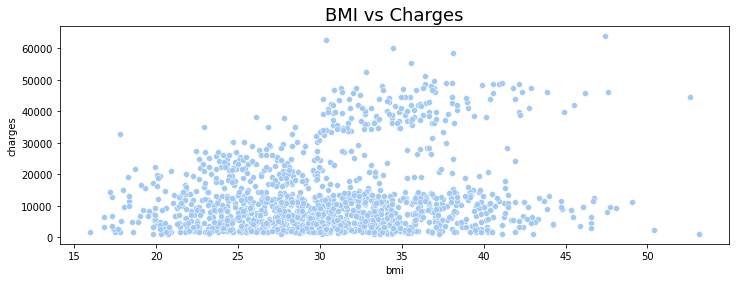

In [35]:
fig = plt.figure(figsize=[12,4])
ax = sns.scatterplot(x=df['bmi'], y=df['charges'])
ax.set_title('BMI vs Charges', fontsize=18)

There seems to be a positive correlation between BMI and charges, but the data are heteroskedastic so it is difficult to determine a definitive relationship between the features.

### Children

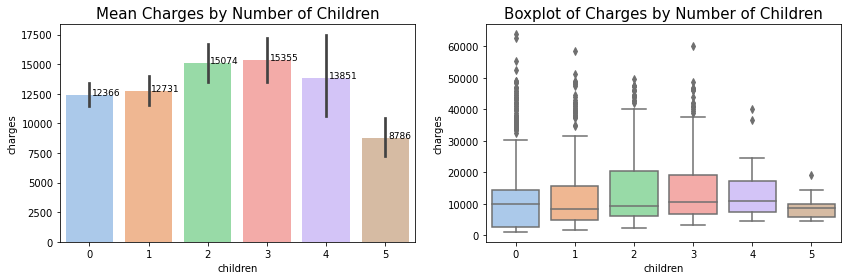

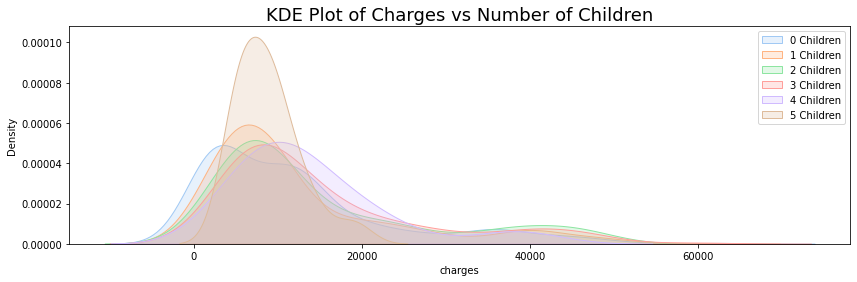

In [36]:
fig = plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
ax = sns.barplot(data=df, x='children', y='charges')
ax.set_title('Mean Charges by Number of Children', fontsize=15)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.8, y=p.get_height(), s='{}'.format(round(p.get_height())), fontsize=9)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x='children', y='charges')
ax.set_title('Boxplot of Charges by Number of Children', fontsize=15)

fig = plt.figure(figsize=[14,4])
for i in range(0,6):             #add overlapping KDE plots labeled with # of children
    sns.kdeplot(df['charges'][df['children']==i], shade=True, label = '{} Children'.format(i))
plt.title('KDE Plot of Charges vs Number of Children', fontsize=18)
plt.legend()

Individuals with 5 children are concentrated around the ~\\$9,000 range with few outliers.  Individuals with 2-4 children have the highest average and IQR for charges.

### Smoker

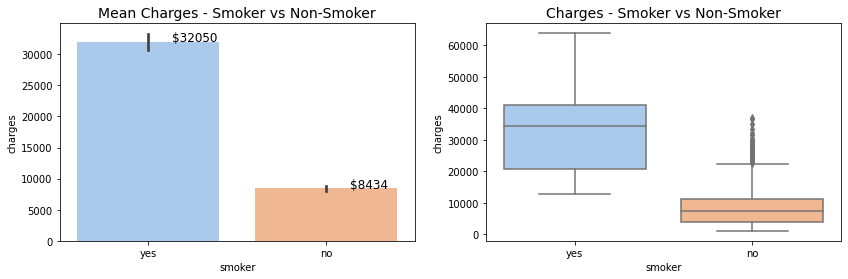

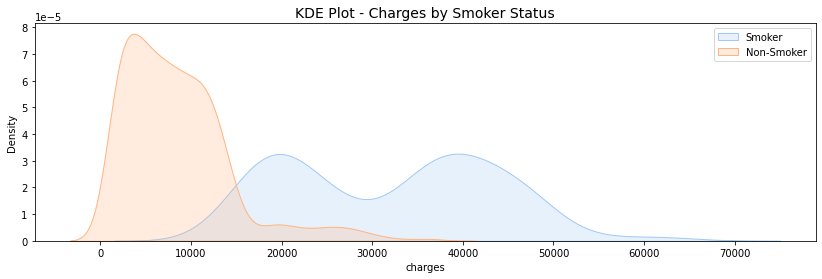

In [37]:
fig = plt.figure(figsize=[14,4]).tight_layout(pad=None)
plt.subplot(1,2,1)
ax = sns.barplot(data=df, x='smoker', y='charges')
ax.set_title('Mean Charges - Smoker vs Non-Smoker', fontsize=14)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.5, y=p.get_height(), s='${}'.format(round(p.get_height())), fontsize=12)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x='smoker', y='charges')
ax.set_title('Charges - Smoker vs Non-Smoker', fontsize=14)

fig = plt.figure(figsize=[14,4]).tight_layout(pad=None)
sns.kdeplot(df['charges'][df['smoker']=='yes'], shade=True, label='Smoker')
sns.kdeplot(df['charges'][df['smoker']=='no'], shade=True, label='Non-Smoker')
plt.title('KDE Plot - Charges by Smoker Status', fontsize=14)
plt.legend()

The disparity in charges between smokers and non-smokers is readily apparent in these charts.  Smoking status has a significant  impact on insurance charges, and will be an important feature for my regression model.

### Region

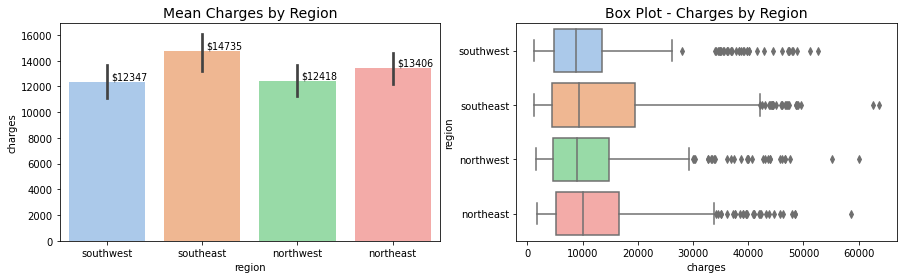

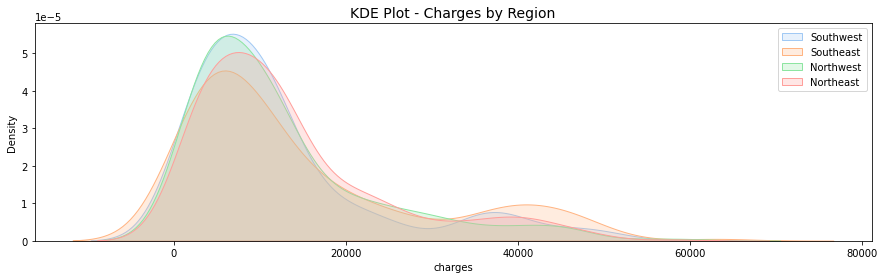

In [38]:
fig = plt.figure(figsize=[15,4]).tight_layout(w_pad=1.0)
plt.subplot(1,2,1)
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_title('Mean Charges by Region', fontsize=14)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.8, y=p.get_height()+200, s='${}'.format(round(p.get_height())), fontsize=9.5)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='charges', y='region')
plt.title('Box Plot - Charges by Region', fontsize=14)

fig = plt.figure(figsize=[15,4])
sns.kdeplot(df['charges'][df['region']=='southwest'], shade=True, label='Southwest')
sns.kdeplot(df['charges'][df['region']=='southeast'], shade=True, label='Southeast')
sns.kdeplot(df['charges'][df['region']=='northwest'], shade=True, label='Northwest')
sns.kdeplot(df['charges'][df['region']=='northeast'], shade=True, label='Northeast')
plt.title('KDE Plot - Charges by Region', fontsize=14)
plt.legend()

Charges don't seem to vary significantly across the different regions, though charges for individuals in the southeast seem to be a bit higher on average, with greater outliers on the high end.

## Multivariate Analysis

After analyzing each feature in isolation, I am now interested in exploring any relationships that exist between different combinations of features.  I will begin with a correlation heatmap of the features, then I will plot various feature combinations to identify any existing relationships.

<AxesSubplot:>

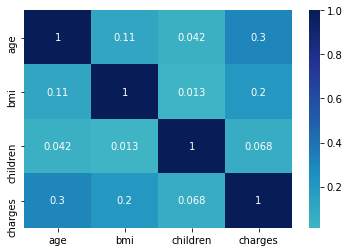

In [39]:
sns.heatmap(df.corr(), center=0, cmap='YlGnBu', robust=True, annot=True)

Age seems to have the highest correlation with charges vs the other features, followed by BMI.  However, this only plots the numberic variables - I need to account for the categorical variables  as well, which means I need to encode the categories as numeric values and re-run the correlation matrix.  I will use pandas' get_dummies function to one-hot encode the categorical features.

In [40]:
df_sub = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
df_onehot_sub = pd.get_dummies(df_sub, columns=['sex', 'children', 'smoker', 'region']).drop(['smoker_no', 'sex_female', 'children_0', 'region_northwest'], axis=1)
df_onehot_sub.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,0,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

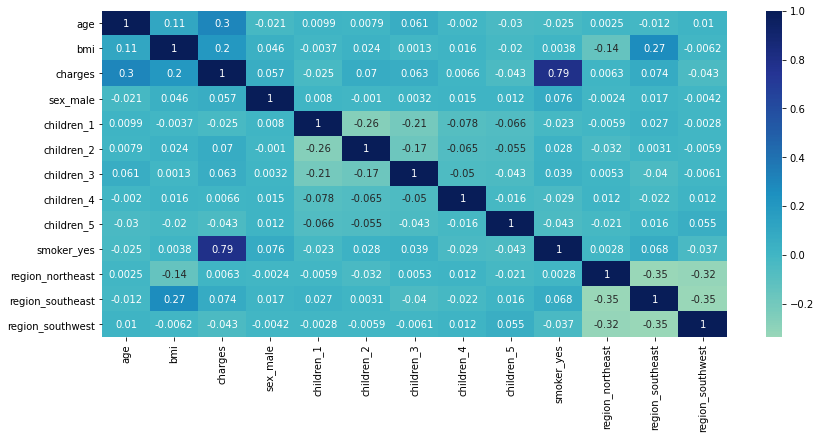

In [41]:
fig = plt.figure(figsize=[14,6])
sns.heatmap(df_onehot_sub.corr(), center=0, cmap='YlGnBu', robust=True, annot=True)

With the categorical features also mapped, a strong correlation between charges and smoking status can be seen. Individuals in the Southeast region also seem to have higher BMIs.

Text(0.5, 1.0, 'Charges vs Age - Region')

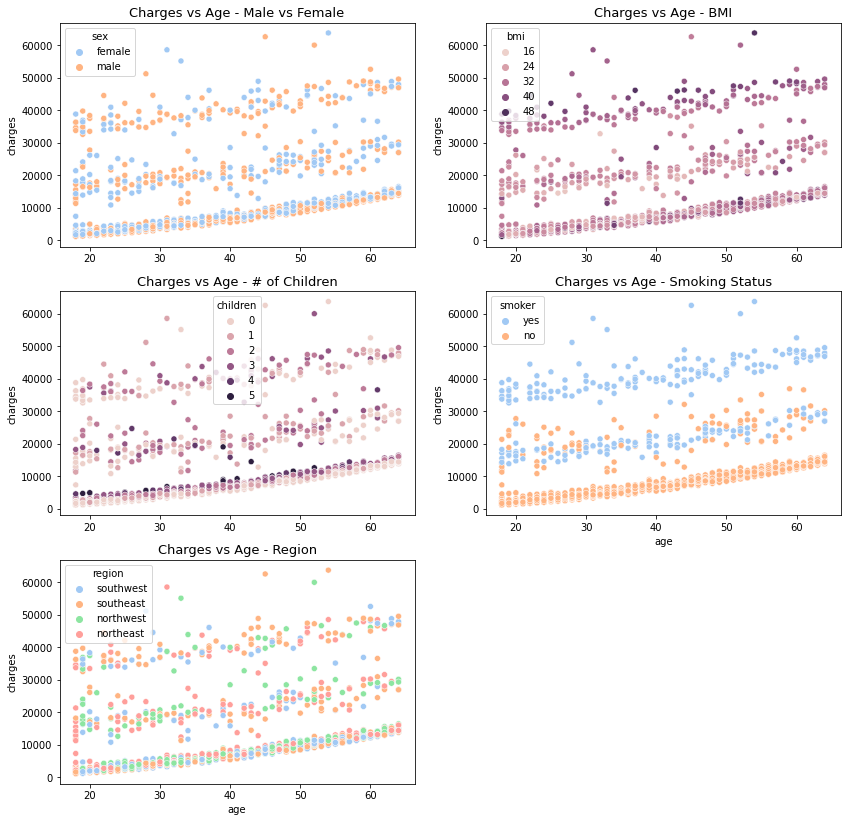

In [42]:
fig = plt.figure(figsize=[14,14]).tight_layout(pad=4.0)

plt.subplot(3,2,1)
ax = sns.scatterplot(data=df, x='age', y='charges', hue='sex')
ax.set_title('Charges vs Age - Male vs Female', fontsize=13)
ax.set_xlabel('')

plt.subplot(3,2,2)
ax = sns.scatterplot(data=df, x='age', y='charges', hue='bmi')
ax.set_title('Charges vs Age - BMI', fontsize=13)
ax.set_xlabel('')

plt.subplot(3,2,3)
ax = sns.scatterplot(data=df, x='age', y='charges', hue='children')
ax.set_title('Charges vs Age - # of Children', fontsize=13)
ax.set_xlabel('')

plt.subplot(3,2,4)
ax = sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
ax.set_title('Charges vs Age - Smoking Status', fontsize=13)

plt.subplot(3,2,5)
ax = sns.scatterplot(data=df, x='age', y='charges', hue='region')
ax.set_title('Charges vs Age - Region', fontsize=13)

The most notable trend discernable from the above charts is the significantly higher charges incurred by smokers vs non smokers, regardless of age.

Since there is a wide range of age values, I will bucket the ages into young, middle-age, and older age buckets.  This may help simplify things a bit.

In [43]:
def age_bucket(df):
    if df['age'] > 45:
        return 'older'
    elif (df['age'] >= 31) & (df['age'] <=45):
        return 'middle age'
    else:
        return 'young'

df['age_bucket'] = df.apply(age_bucket, axis=1)

df['age_bucket'].value_counts()

older         500
young         444
middle age    394
Name: age_bucket, dtype: int64

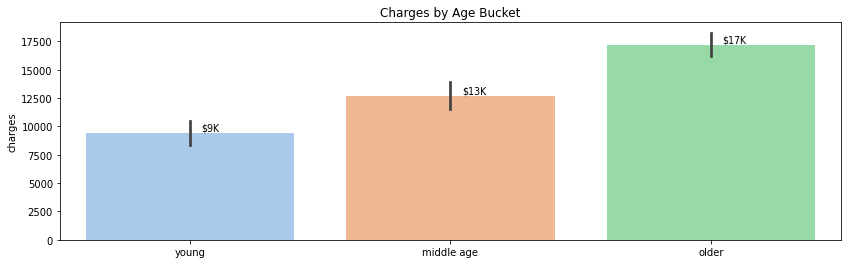

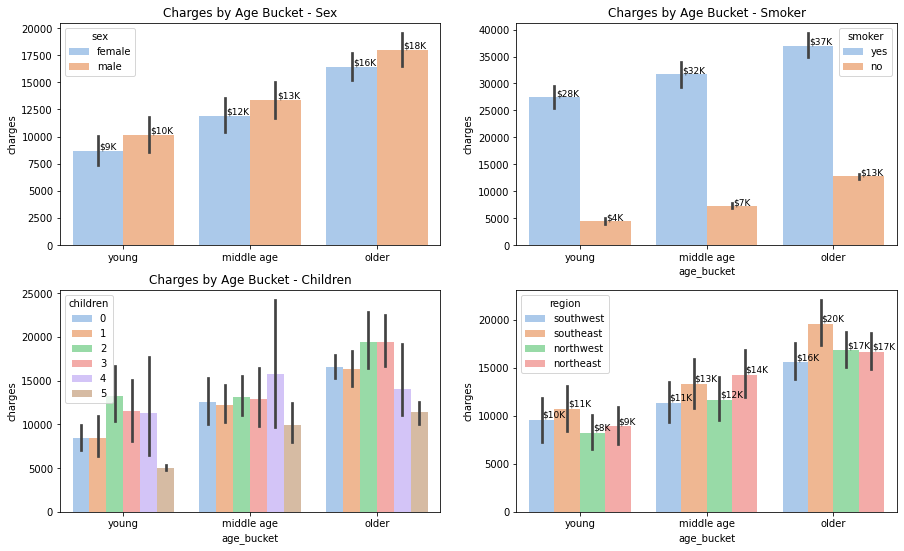

In [44]:
fig = plt.figure(figsize=[14,4]).tight_layout()
ax = sns.barplot(data=df, x='age_bucket',y='charges')
ax.set_title('Charges by Age Bucket')
ax.set_xlabel('')
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.8, y=p.get_height()+200, s='${}K'.format(round(p.get_height()/1000)), fontsize=9.5)

fig = plt.figure(figsize=[15,9]).tight_layout()
plt.subplot(2,2,1)
ax = sns.barplot(data=df, x='age_bucket', y='charges', hue='sex')
ax.set_title('Charges by Age Bucket - Sex')
ax.set_xlabel('')
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.9, y=p.get_height()+200, s='${}K'.format(round(p.get_height()/1000)), fontsize=9)

plt.subplot(2,2,2)
ax = sns.barplot(data=df, x='age_bucket', y='charges', hue='smoker')
ax.set_title('Charges by Age Bucket - Smoker')
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.9, y=p.get_height()+200, s='${}K'.format(round(p.get_height()/1000)), fontsize=9)

plt.subplot(2,2,3)
ax = sns.barplot(data=df, x='age_bucket', y='charges', hue='children')
ax.set_title('Charges by Age Bucket - Children')
# for p in ax.patches:
#     ax.text(x=p.get_x()+p.get_width()/3, y=p.get_height()+200, s='${}K'.format(round(p.get_height()/1000)), fontsize=8)

plt.subplot(2,2,4)
ax = sns.barplot(data=df, x='age_bucket', y='charges', hue='region')
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.9, y=p.get_height()+300, s='${}K'.format(round(p.get_height()/1000)), fontsize=9)

The differential in mean charges between the regions is interesting. The northwest region surpasses the northeast from the middle age to the older age bucket.

I will now explore BMI.

Text(0.5, 1.0, 'Charges vs BMI - Children')

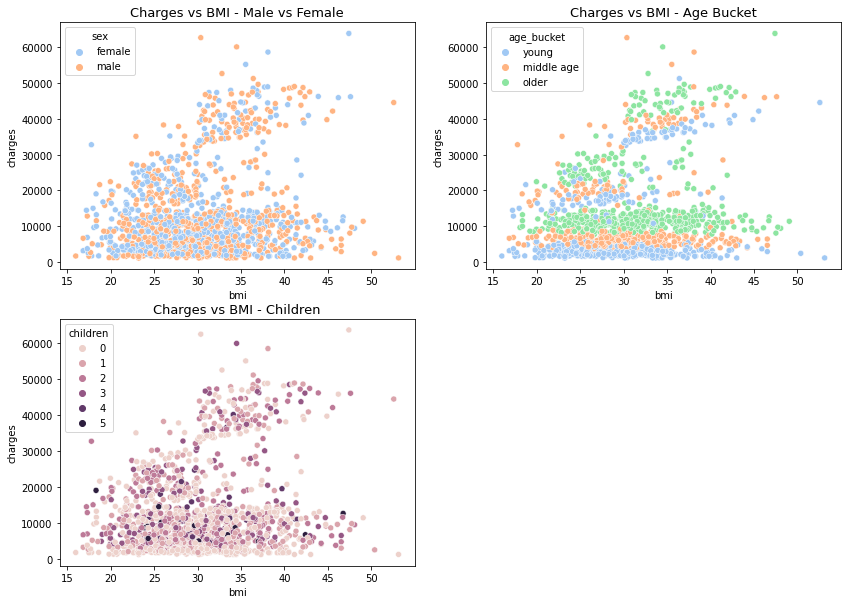

In [45]:
fig = plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
ax = sns.scatterplot(data=df, x='bmi', y='charges', hue='sex')
ax.set_title('Charges vs BMI - Male vs Female', fontsize=13)

plt.subplot(2,2,2)
ax = sns.scatterplot(data=df, x='bmi', y='charges', hue='age_bucket')
ax.set_title('Charges vs BMI - Age Bucket', fontsize=13)

plt.subplot(2,2,3)
ax = sns.scatterplot(data=df, x='bmi', y='charges', hue='children')
ax.set_title('Charges vs BMI - Children', fontsize=13)

Charges are clearly higher for older people vs middle age and young, across all BMI types.

Similarly to age, I will bucket the BMI into low, medium and high, based on the IQR.

In [46]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [47]:
def bmi_bucket(df):
    if df['bmi'] > 34:
        return 'high bmi'
    elif (df['bmi'] <=34) & (df['bmi'] >=26):
        return 'medium bmi'
    else:
        return 'low bmi'

df['bmi bucket'] = df.apply(bmi_bucket, axis=1)

df['bmi bucket'].value_counts()

medium bmi    641
high bmi      380
low bmi       317
Name: bmi bucket, dtype: int64

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


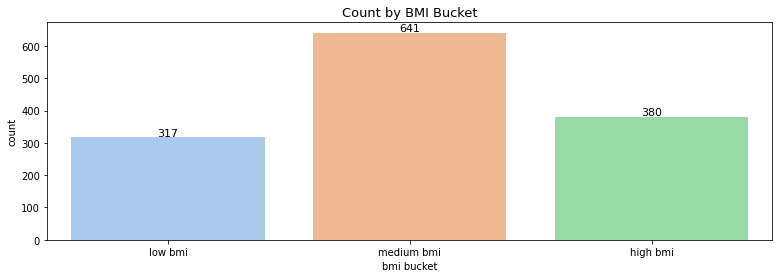

In [48]:
fig = plt.figure(figsize=[13,4])
ax = sns.countplot(df['bmi bucket'].sort_values(), order=['low bmi', 'medium bmi', 'high bmi'])
ax.set_title('Count by BMI Bucket', fontsize=13)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/2, y=p.get_height()+5, s='{}'.format(round(p.get_height())), ha='center', fontsize=11)

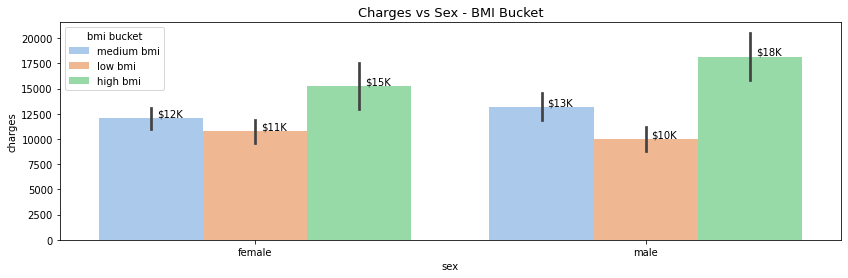

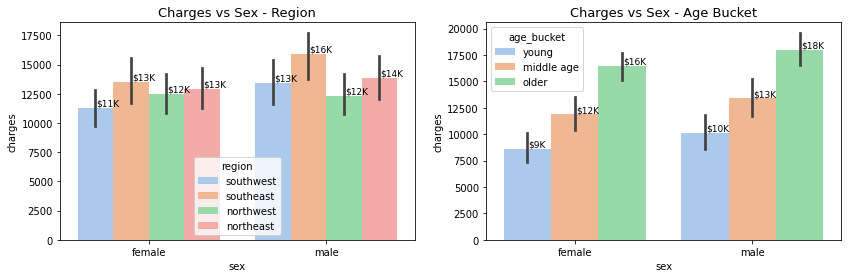

In [49]:
fig = plt.figure(figsize=[14,4])
ax = sns.barplot(data=df, x='sex', y='charges', hue='bmi bucket')
ax.set_title('Charges vs Sex - BMI Bucket', fontsize=13)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.8, y=p.get_height()+200, s='${}K'.format(round(p.get_height()/1000)), fontsize=10)

fig = plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
ax = sns.barplot(data=df, x='sex', y='charges', hue='region')
ax.set_title('Charges vs Sex - Region', fontsize=13)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.9, y=p.get_height()+200, s='${}K'.format(round(p.get_height()/1000)), fontsize=9)

plt.subplot(1,2,2)
ax = sns.barplot(data=df, x='sex', y='charges', hue='age_bucket')
ax.set_title('Charges vs Sex - Age Bucket', fontsize=13)
for p in ax.patches:
    ax.text(x=p.get_x()+p.get_width()/1.9, y=p.get_height()+200, s='${}K'.format(round(p.get_height()/1000)), fontsize=9)

The differential in mean charges for males of high bmi vs medium bmi is greater than with the differential between females of high bmi vs females of medium bmi.

I will now bucket the number of children as well to reduce the number of categories for this feature.

In [50]:
def children_bucket(df):
    if df['children'] == 0:
        return 'no children'
    else:
        return '1+'
    
df['children bucket'] = df.apply(children_bucket, axis=1)

In [51]:
df['children bucket'].value_counts()

1+             764
no children    574
Name: children bucket, dtype: int64

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bucket,bmi bucket,children bucket
0,19,female,27.900,0,yes,southwest,16884.92400,young,medium bmi,no children
1,18,male,33.770,1,no,southeast,1725.55230,young,medium bmi,1+
2,28,male,33.000,3,no,southeast,4449.46200,young,medium bmi,1+
3,33,male,22.705,0,no,northwest,21984.47061,middle age,low bmi,no children
4,32,male,28.880,0,no,northwest,3866.85520,middle age,medium bmi,no children


# Data Preprocessing & Modeling

Now that I've explored all my features and have an idea of which are most impactful to insurance charges, I will preprocess the data to feed into a linear regression model to predict charges from the features provided.

I will begin by building a model solely from the categorical features, including the buckets for age, BMI, and number of children.  I will then build a second model that retains the continuous values for age, BMI and number of children.

In [75]:
df_sub1 = df[['age_bucket', 'sex', 'bmi bucket', 'children bucket', 'smoker', 'region']]
li = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
df_sub1_onehot = pd.get_dummies(df_sub1, prefix = li).drop(['age_young', 'sex_female', 'bmi_low bmi', 'children_no children', 'smoker_no', 'region_northwest'], axis=1)
df_sub1_onehot.head()

,age_middle age,age_older,sex_male,bmi_high bmi,bmi_medium bmi,children_1+,smoker_yes,region_northeast,region_southeast,region_southwest
0,0,0,0,0,1,0,1,0,0,1
1,0,0,1,0,1,1,0,0,1,0
2,0,0,1,0,1,1,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,0


In [77]:
X=df_sub1_onehot
y=df[['charges']]

In [79]:
#feature scaling for charges via SKLearn's StandardScaler

sc = StandardScaler()
y = sc.fit_transform(y)

In [80]:
# split data between training and testing datasets via SKLearn's train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [81]:
X_train.head()

,age_middle age,age_older,sex_male,bmi_high bmi,bmi_medium bmi,children_1+,smoker_yes,region_northeast,region_southeast,region_southwest
216,0,1,0,0,1,0,0,0,0,0
731,0,1,1,0,0,1,0,0,0,1
866,0,0,1,1,0,0,0,0,1,0
202,0,1,0,0,0,0,0,0,0,0
820,1,0,1,0,1,1,0,0,0,1


In [82]:
y_train[0:5]

array([[-0.24078187],
       [-0.26475678],
       [-1.00194062],
       [-0.0213303 ],
       [-0.48114588]])

Now that the data are ready, I will build a linear regression model and fit the data to the model. Then I will evaluate the model's performance.

In [91]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Print the coefficients & intercept

print(X_train.columns)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Index(['age_middle age', 'age_older', 'sex_male', 'bmi_high bmi',
       'bmi_medium bmi', 'children_1+', 'smoker_yes', 'region_northeast',
       'region_southeast', 'region_southwest'],
      dtype='object')
Coefficients:  [[ 0.17905607  0.65843942 -0.01352296  0.39931536  0.18796618  0.07248478
   1.95351906  0.02675224 -0.03002025 -0.03867004]]
Intercept:  [-0.92340534]


In [94]:
print('Training Score: ',regr.score(X_train, y_train))
print('Testing Score: ',regr.score(X_test, y_test))

Training Score:  0.7325593097688361
Testing Score:  0.7450149168867812


## Regression Model 2

The second model will retain the numerical age and bmi variables.

In [98]:
df_sub2 = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
df_sub2_onehot = pd.get_dummies(df_sub2, columns=['sex', 'children', 'smoker', 'region']).drop(['sex_female', 'children_0', 'smoker_no', 'region_northwest'], axis=1)
df_sub2_onehot.head()

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_southeast,region_southwest
0,19,27.900,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1,1,0,0,0,0,0,0,1,0
2,28,33.000,1,0,0,1,0,0,0,0,1,0
3,33,22.705,1,0,0,0,0,0,0,0,0,0
4,32,28.880,1,0,0,0,0,0,0,0,0,0


In [100]:
df_sub2_onehot_temp = df_sub2_onehot[['age', 'bmi']]
df_sub2_onehot_temp2 = df_sub2_onehot.drop(columns=['age', 'bmi'])

df_sub2_onehot_temp = sc.fit_transform(df_sub2_onehot_temp)
df_sub2_onehot_temp = pd.DataFrame(df_sub2_onehot_temp, columns=['age', 'bmi'])
df_sub2_onehot_temp.head()

,age,bmi
0,-1.438764,-0.453320
1,-1.509965,0.509621
2,-0.797954,0.383307
3,-0.441948,-1.305531
4,-0.513149,-0.292556


In [101]:
df_sub2_onehot_temp = pd.concat([df_sub2_onehot_temp, df_sub2_onehot_temp2], axis=1)
df_sub2_onehot_temp.head()

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_southeast,region_southwest
0,-1.438764,-0.453320,0,0,0,0,0,0,1,0,0,1
1,-1.509965,0.509621,1,1,0,0,0,0,0,0,1,0
2,-0.797954,0.383307,1,0,0,1,0,0,0,0,1,0
3,-0.441948,-1.305531,1,0,0,0,0,0,0,0,0,0
4,-0.513149,-0.292556,1,0,0,0,0,0,0,0,0,0


In [103]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_sub2_onehot_temp,y,test_size = 0.2, random_state=1)

In [104]:
regr2 = linear_model.LinearRegression()
regr2.fit (X_train2, y_train2)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[ 0.29943241  0.16141112 -0.01968494  0.00252571  0.10452093  0.06637977
   0.24184723  0.09779686  1.96410772  0.03350236 -0.05135118 -0.03993854]]
Intercept:  [-0.41029678]


In [105]:
print('Training Score: ',regr2.score(X_train2, y_train2))
print('Testing Score: ',regr2.score(X_test2, y_test2))

Training Score:  0.7486438664081898
Testing Score:  0.7632007319189733


Model 2 performed slightly better than Model 1, with a score of 0.763 in the testing set compared to 0.745 in Model 1. An interesting question is whether a model that uses only a subset of features would perform better than Model 1 and 2, which retain all the features.

## Model 3

In [106]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bucket,bmi bucket,children bucket
0,19,female,27.900,0,yes,southwest,16884.92400,young,medium bmi,no children
1,18,male,33.770,1,no,southeast,1725.55230,young,medium bmi,1+
2,28,male,33.000,3,no,southeast,4449.46200,young,medium bmi,1+
3,33,male,22.705,0,no,northwest,21984.47061,middle age,low bmi,no children
4,32,male,28.880,0,no,northwest,3866.85520,middle age,medium bmi,no children


In [111]:
df_sub3 = df[['age', 'sex', 'smoker', 'bmi']]
#df_sub3.head()
df_sub3_onehot = pd.get_dummies(df_sub3).drop(['sex_female', 'smoker_no'], axis=1)
df_sub3_onehot.head()

,age,bmi,sex_male,smoker_yes
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,1,0
3,33,22.705,1,0
4,32,28.880,1,0


In [112]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_sub3_onehot,y,test_size = 0.2, random_state=1)

In [115]:
regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, y_train3)

print(df_sub3_onehot.columns)
print('Coefficients: ', regr3.coef_)
print ('Intercept: ',regr3.intercept_)

Index(['age', 'bmi', 'sex_male', 'smoker_yes'], dtype='object')
Coefficients:  [[ 0.02139021  0.02511368 -0.01733639  1.96131372]]
Intercept:  [-2.0023144]


In [116]:
print('Training Score: ',regr3.score(X_train3, y_train3))
print('Testing Score: ',regr3.score(X_test3, y_test3))

Training Score:  0.7450135987062217
Testing Score:  0.7565120021066973


The score for Model 3 was slightly lower than for Model 2, but slightly higher than Model 1.